In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('final_crop_dataset.csv')
df.head()

,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Crop
0,Bhopal,Bhopal(F&V),Other,Fruits,36.0,800.0,1200.0,1000.0,2023-06-22,Karbuja
1,Bhopal,Bhopal(F&V),Other,Fruits,108.0,600.0,1000.0,800.0,2023-06-15,Karbuja
2,Bhopal,Bhopal(F&V),Other,Fruits,99.0,600.0,1000.0,800.0,2023-06-14,Karbuja
3,Bhopal,Bhopal(F&V),Other,Fruits,45.0,600.0,1000.0,800.0,2023-06-13,Karbuja
4,Bhopal,Bhopal(F&V),Other,Fruits,18.0,600.0,1000.0,800.0,2023-06-12,Karbuja


In [4]:
df['Reported Date'] = pd.to_datetime(df['Reported Date'])

In [5]:
class Crop:
    def __init__(self, df):
        self.df = df
        self.districts = df['District Name'].unique().tolist()
        self.crops = df['Crop'].unique().tolist()
        # print(self.crops)

    def district_selection_crop_based(self, crop, year=None):
            
        df_filt = self.df[self.df['Crop']==crop]
        correlation_dict = {}
        for district in df_filt['District Name'].unique().tolist():
            
            df_final = df_filt[df_filt['District Name']==district]
            if len(df_final)>12:
                corr_val = df_final['Arrivals (Tonnes)'].corr(df_final['Modal Price (Rs./Quintal)'])
                correlation_dict[district]=corr_val
        correlation_dict = dict(sorted(correlation_dict.items(), key=lambda item:item[1], reverse=True))
        # print(correlation_dict)
        dist_names = list(correlation_dict.keys())
        corr_values = list(correlation_dict.values())
        plt.figure(figsize=(18,5))
        sns.barplot(x = dist_names, y = corr_values)
        plt.title(f" District recommendation based on crop {crop}")


    def crop_selection_district_based(self, district, year=None):

        df_filt = self.df[self.df['District Name']==district]
        correlation_dict = {}
        for crop in df_filt['Crop'].unique().tolist():
            
            df_final = df_filt[df_filt['Crop']==crop]
            if len(df_final)>10:
                corr_val = df_final['Modal Price (Rs./Quintal)'].corr(df_final['Arrivals (Tonnes)'])
                correlation_dict[crop]=corr_val
        print(correlation_dict)
        correlation_dict = dict(sorted(correlation_dict.items(), key=lambda item:item[1], reverse=True))

        crop_names = list(correlation_dict.keys())
        corr_values = list(correlation_dict.values())
        plt.figure(figsize=(18,5))
        sns.barplot(x = crop_names, y = corr_values)
        plt.title(f" Crop recommendation based on district {district}")

    def price_trend_districts(self, crop, district=None):
    
        district_data = self.df[(self.df['Crop']==crop)]
        district_data['Reported Date'] = pd.to_datetime(district_data['Reported Date'])
        district_data.set_index('Reported Date', inplace=True)
        sns.lineplot(district_data['Modal Price (Rs./Quintal)'])
    
        plt.title(f"Price Trend of {crop}")
        plt.xlabel("Date")
        plt.ylabel("Modal Price (Rs./Quintal)")
        plt.xticks(rotation=45)
        plt.show()
            


c=Crop(df)

{'Leafy Vegetable': -0.3679930053283877, 'Lemon': -0.044211387197720005, 'Mango': 0.17323982946667274, 'Masur Dal': -0.12583510748573246, 'Mousambi(Sweet Lime)': 0.3176842195249573, 'Neem Seed': 0.252971563664371, 'Orange': -0.12351775682873156, 'Papaya': -0.11756359672220346, 'Peas cod': -0.7138473615563206, 'Peas Wet': -0.17842333128926824}


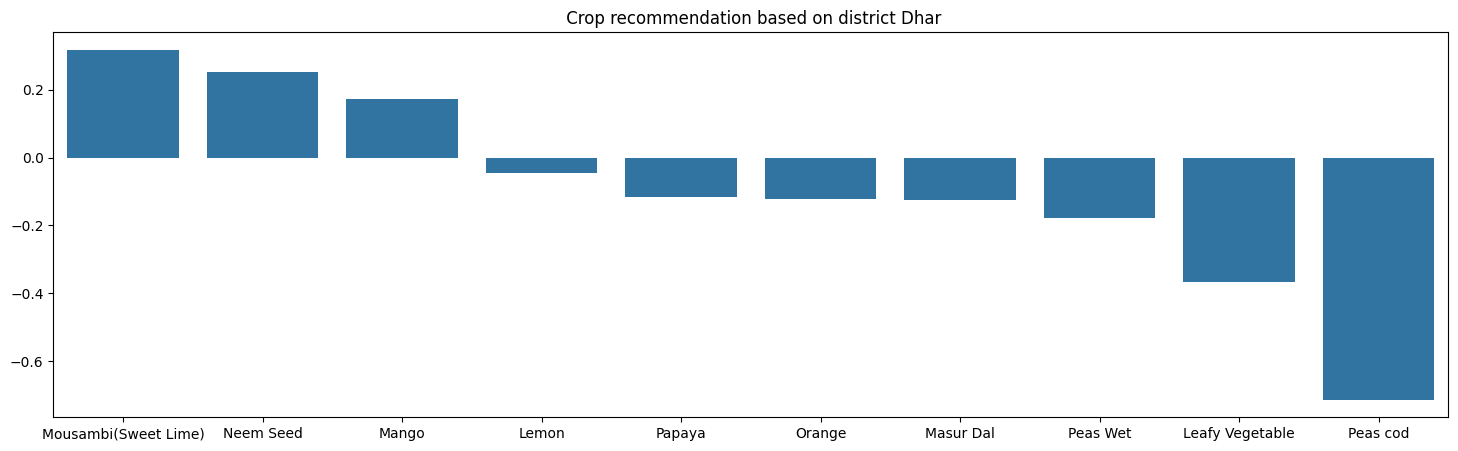

In [6]:
c.crop_selection_district_based('Dhar')

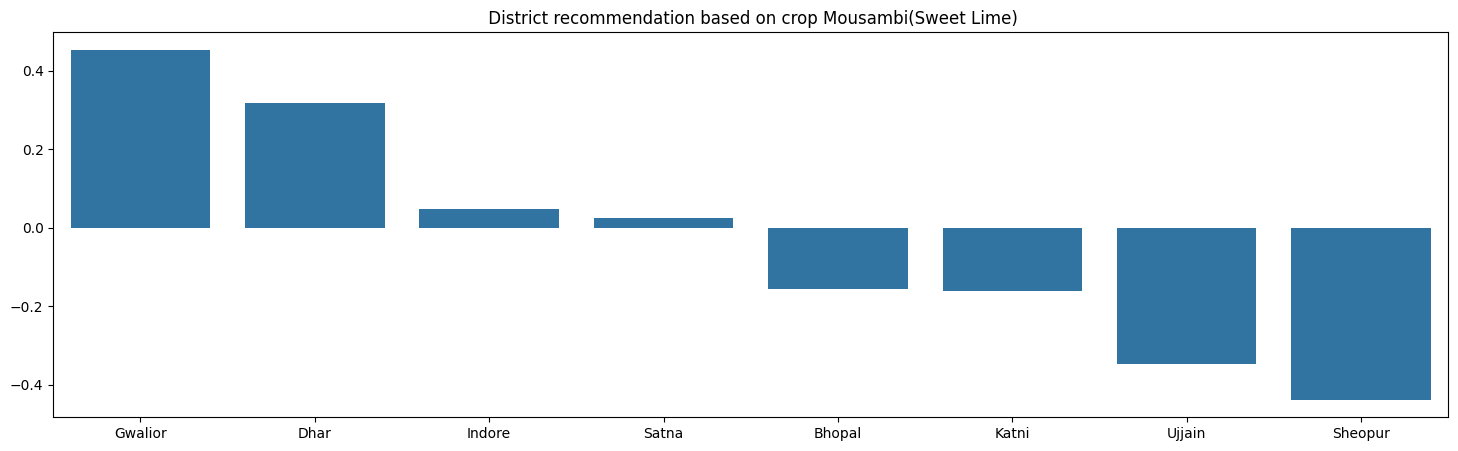

In [7]:
c.district_selection_crop_based('Mousambi(Sweet Lime)')

C:\Users\admin\AppData\Local\Temp\ipykernel_4544\3680835730.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_data['Reported Date'] = pd.to_datetime(district_data['Reported Date'])


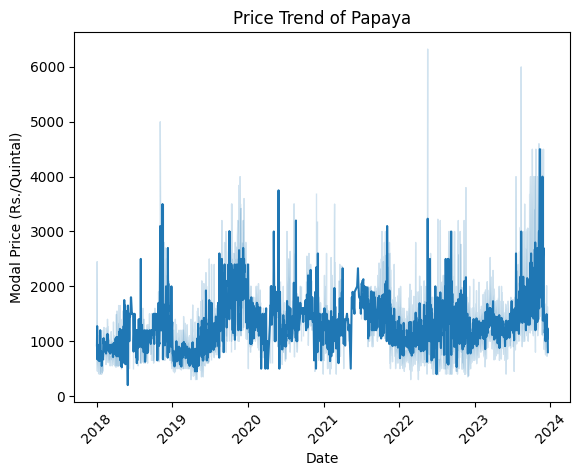

In [8]:
c.price_trend_districts('Papaya')

In [88]:
df['Crop'].unique()

array(['Karbuja', 'Kartali', 'Kinnow', 'Kodo Millet(Varagu)',
       'Kulthi(Horse Gram)', 'Lak(Teora)', 'Leafy Vegetable', 'Lemon',
       'Lime', 'Little gourd (Kundru)', 'Mango', 'Masur Dal',
       'Mint(Pudina)', 'Mousambi(Sweet Lime)', 'Mustard Oil',
       'Myrobolan(Harad)', 'Neem Seed', 'Orange', 'Paddy(Dhan)(Basmati)',
       'Papaya (Raw)', 'Papaya', 'Pear(Marasebu)', 'Peas cod', 'Peas Wet'],
      dtype=object)

In [79]:
df['District Name'].unique()

array(['Bhopal', 'Burhanpur', 'Chhindwara', 'Narsinghpur', 'Guna',
       'Harda', 'Indore', 'Hoshangabad', 'Katni', 'Gwalior', 'Morena',
       'Jhabua', 'Satna', 'Badwani', 'Singroli', 'Sheopur', 'Ujjain',
       'Anupur', 'Rewa', 'Balaghat', 'Shehdol', 'Mandla', 'Seoni',
       'Dindori', 'Sidhi', 'Umariya', 'Panna', 'Khargone', 'Chhatarpur',
       'Raisen', 'Dhar', 'Sagar', 'Sehore', 'Ratlam', 'Shivpuri',
       'Khandwa', 'Mandsaur', 'Jabalpur', 'Ashoknagar', 'Vidisha',
       'Bhind', 'Betul', 'Damoh', 'Rajgarh', 'Alirajpur', 'Datia',
       'Shajapur', 'Dewas'], dtype=object)

In [81]:
df['Reported Date'] = pd.to_datetime(df['Reported Date'])
# df.set_index('Reported Date', inplace=True)



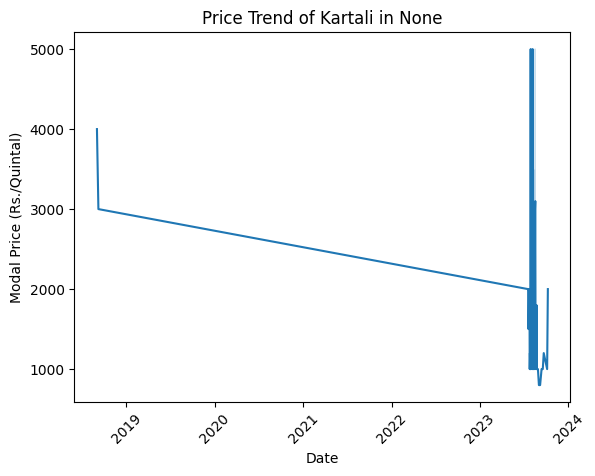

In [ ]:
def district_selection()